In [114]:
import pandas as pd
from sklearn.utils import resample

# Separar las clases
class_0 = data_clean[data_clean['Exited'] == 0]
class_1 = data_clean[data_clean['Exited'] == 1]

perc=0.7
sample=len(class_1)/perc-class_0
# Submuestrear la clase mayoritaria
class_0_downsampled = resample(class_0, replace=False, n_samples=len(class_1), random_state=42)

# Combinar las clases submuestreada con la clase minoritaria
balanced_data = pd.concat([class_0_downsampled, class_1])

# Verificar el nuevo balance
balanced_data['Exited'].value_counts()

Exited
0    36953
1    36953
Name: count, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

num_variables = ["Age", "NumOfProducts", "IsActiveMember", "Sex", "Countries", "Balance", "Cred_Bal_Sal_out", "Bal_sal_out"]

# Dividir el conjunto de datos en entrenamiento y prueba
X = data_clean.drop("Exited", axis=1)[num_variables]
y = data_clean["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el escalador (Normalizar)
scaler = StandardScaler()

# Ajustar (fit) el escalador solo con el conjunto de entrenamiento
scaler.fit(X_train)

# Transformar (transform) tanto el conjunto de entrenamiento como el de prueba
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Crear DataFrames con los datos normalizados
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=num_variables)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=num_variables)

X_train_norm.head()

,Age,NumOfProducts,IsActiveMember,Sex,Countries,Balance,Cred_Bal_Sal_out,Bal_sal_out
129722,-1.469151,-1.006431,-0.998579,-1.137682,1.644835,0.316601,0.767076,0.658658
68536,0.872675,0.812756,-0.998579,-1.137682,-0.800015,-0.899138,-0.779683,-0.783382
4871,-1.023089,0.812756,1.001423,-1.137682,1.644835,1.928829,1.661832,1.284575
103603,-0.353996,-1.006431,1.001423,0.878980,-0.800015,-0.899138,-0.779683,-0.783382
18601,1.876315,0.812756,1.001423,0.878980,-0.800015,-0.899138,-0.779683,-0.783382


In [116]:
X_train_norm["Exited"] = list(y_train)
X_test_norm["Exited"] = list(y_test)

In [117]:
X_train_norm.to_csv("../data/processed/clean_train.csv", index = False)
X_test_norm.to_csv("../data/processed/clean_test.csv", index = False)

## Árbol de decisión ##

In [118]:
train_data = pd.read_csv("C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/Proyecto-Final/Final-Project-Eli-Isa-Bank-Churn/data/processed/clean_test.csv")
test_data = pd.read_csv("C:/Users/elisa/OneDrive/Escritorio/Data Sciencie/Proyecto-Final/Final-Project-Eli-Isa-Bank-Churn/data/processed/clean_train.csv")

train_data.head()

,Age,NumOfProducts,IsActiveMember,Sex,Countries,Balance,Cred_Bal_Sal_out,Bal_sal_out,Exited
0,1.764799,0.812756,-0.998579,-1.137682,-0.800015,-0.899138,-0.779683,-0.783382,1
1,0.426613,-1.006431,-0.998579,0.878980,-0.800015,-0.899138,-0.779683,-0.783382,0
2,0.092067,-1.006431,1.001423,-1.137682,0.422410,1.079182,0.760609,0.654669,0
3,-0.577027,-1.006431,1.001423,-1.137682,-0.800015,0.846170,0.373243,0.322871,0
4,0.315098,0.812756,-0.998579,0.878980,0.422410,1.121438,2.466620,2.766864,0


In [119]:
X_train = train_data.drop(["Exited"], axis=1)
y_train = train_data["Exited"]
X_test = test_data.drop(["Exited"], axis=1)
y_test = test_data["Exited"]

<Axes: >

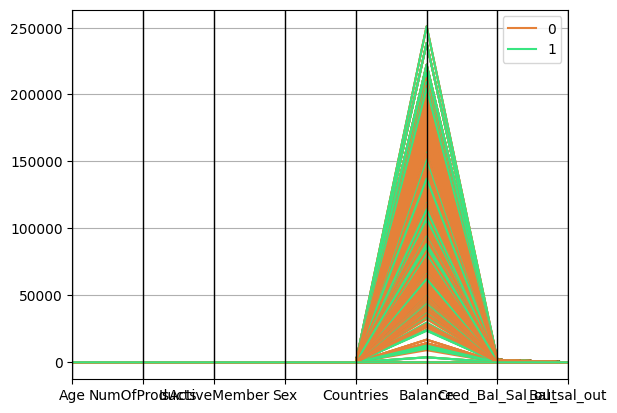

In [ ]:
import pandas as pd

data_clean = X
data_clean["Exited"] = y

pd.plotting.parallel_coordinates(data_clean, "Exited", color = ("#E58139", "#39E581"))

In [120]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

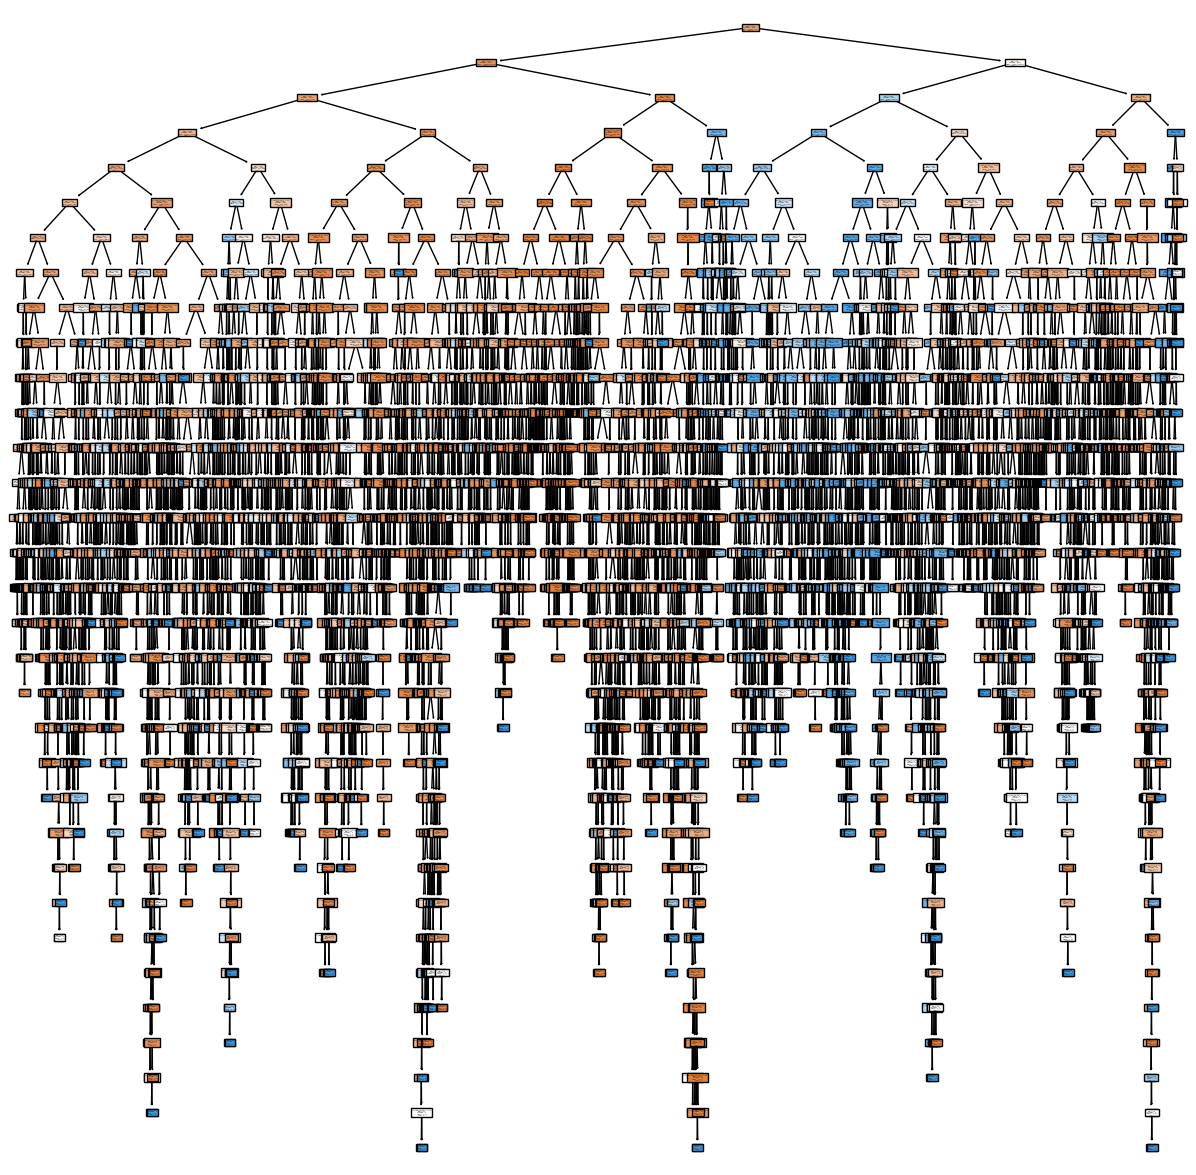

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [121]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8207266102239845